In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Dimensions
n, m = 4, 3
eta = 0.01           # learning rate for B
eta_lambda = 0.1     # learning rate for lambda
P_total = 10
max_iters = 1000
tol = 1e-6


In [11]:

# --- Random initialization ---
np.random.seed(0)


H = np.random.randn(n, m)
x = np.random.uniform(-1, 1, size=(m, 1))  # Uniform distribution between -1 and 1
z = np.random.randn(n, 1)
a = np.ones((m, 1))  # All ones



In [12]:
 # Constant
aTx = float(a.T @ x)
lambda_reg = 1.0  # initialize Lagrange multiplier
B = np.random.randn(n, m)

for iter in range(max_iters):
    BH = B * H
    y = BH @ x + z - aTx

    # Gradient of Lagrangian w.r.t. B
    grad = 2 * (y @ x.T) * H + 2 * lambda_reg * B

    # Update B
    B_new = B - eta * grad

    # Frobenius norm squared of B_new
    frob_sq = np.sum(B_new ** 2)

    # Update lambda using projected gradient ascent (KKT-style)
    lambda_reg += eta_lambda * (frob_sq - P_total)
    lambda_reg = max(0, lambda_reg)

    # Check convergence
    if np.linalg.norm(B_new - B, ord='fro') < tol:
        print(f"Converged at iteration {iter}")
        break

    B = B_new

# Final values
print("Optimized B:")
print(B)
print("Final lambda:", lambda_reg)


Optimized B:
[[-0.66974605 -0.17506952  0.16022903]
 [ 0.25584507 -0.52269113  0.36149376]
 [-0.69954115 -1.34502935  0.31737576]
 [ 1.41063695 -0.41869552  1.04863183]]
Final lambda: 0


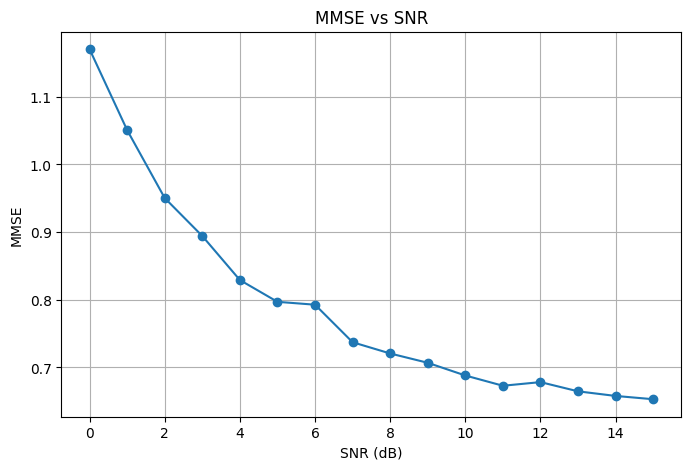

In [13]:
# Function to compute MMSE for one round
def compute_mmse(B, H, x, a, snr_db):
    n = B.shape[0]
    BH = B * H
    signal = BH @ x
    P_signal = np.sum(signal**2) / n
    snr_linear = 10 ** (snr_db / 10)
    P_noise = P_signal / snr_linear
    z = np.random.normal(0, np.sqrt(P_noise), size=(n, 1))
    y = signal + z
    target = a.T @ x
    mmse = np.sum((y - target) ** 2) / n
    return mmse

# MMSE for SNR = 0 to 15 dB over 100 rounds
snrs = np.arange(0, 16)
mmse_vals = []
for snr_db in snrs:
    mmse_list = [compute_mmse(B, H, x, a, snr_db) for _ in range(500)]
    mmse_vals.append(np.mean(mmse_list))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(snrs, mmse_vals, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('MMSE')
plt.title('MMSE vs SNR')
plt.grid(True)
plt.show()